#### Test BHRC Data

In [ ]:
import datetime, sys, warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import Image
from pyprojroot import here

sys.path.insert(0, f"{here()}/src")

from predict import create_testdataloader, predictbrainage
from plots import scatter_predicted_chronological, scatter_bag_age, age_distribution_plot, brainage_distribution_plot

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_columns', None)
pd.reset_option("mode.chained_assignment")

In [2]:
proj_dir = here()

##### Load BHRC data

In [3]:
df, test_dataloader = create_testdataloader('bhrc')

Found 1 csv files
(674, 10)
Index: 0, 1, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-1.1370])
Index: 1, 3, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.4463])
Index: 2, 3, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.5908])


In [4]:
df.head(3)

filename  scan_id   scan_age      sex       group  \
0  BHRC-sub-00003.nii.gz      3.0   8.856947   Female   Ctrls       
1  BHRC-sub-00015.nii.gz     15.0  12.848734   Female   Ctrls       
2  BHRC-sub-00016.nii.gz     16.0  12.013689   Male     FHR (SMI)   

   participant_id             filename_y age_bracket  age_bracket_class  \
0  BHRC-sub-00003  BHRC-sub-00003.nii.gz         6-8                  1   
1  BHRC-sub-00015  BHRC-sub-00015.nii.gz       12-14                  3   
2  BHRC-sub-00016  BHRC-sub-00016.nii.gz       12-14                  3   

   scan_age_z  
0   -1.137047  
1   -0.446287  
2   -0.590788

In [5]:
df2, test_dataloader2 = create_testdataloader('bhrc2')

Found 1 csv files
(439, 10)
Index: 0, 4, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([0.1156])
Index: 1, 3, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.3402])
Index: 2, 2, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([-0.6794])


In [6]:
df2.head(3)

filename  scan_id   scan_age      sex       group  \
0  BHRC2-sub-00016.nii.gz     16.0  16.095825   Male     FHR (SMI)   
1  BHRC2-sub-00018.nii.gz     18.0  13.462012   Male     FHR (SMI)   
2  BHRC2-sub-00050.nii.gz     50.0  11.501711   Female   Ctrls       

    participant_id              filename_y age_bracket  age_bracket_class  \
0  BHRC2-sub-00016  BHRC2-sub-00016.nii.gz       15-17                  4   
1  BHRC2-sub-00018  BHRC2-sub-00018.nii.gz       12-14                  3   
2  BHRC2-sub-00050  BHRC2-sub-00050.nii.gz        9-11                  2   

   scan_age_z  
0    0.115606  
1   -0.340162  
2   -0.679383

In [7]:
df3, test_dataloader3 = create_testdataloader('bhrc3')

Found 1 csv files
(387, 10)
Index: 0, 4, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([0.1028])
Index: 1, 4, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([0.0109])
Index: 2, 5, Image shape: torch.Size([1, 121, 145, 121]), Label: tensor([0.8187])


In [8]:
df3.head(3)

filename  scan_id   scan_age      sex       group  \
0  BHRC3-sub-00003.nii.gz      3.0  16.021903   Female   Ctrls       
1  BHRC3-sub-00028.nii.gz     28.0  15.490760   Male     Ctrls       
2  BHRC3-sub-00030.nii.gz     30.0  20.158795   Male     Ctrls       

    participant_id              filename_y age_bracket  age_bracket_class  \
0  BHRC3-sub-00003  BHRC3-sub-00003.nii.gz       15-17                  4   
1  BHRC3-sub-00028  BHRC3-sub-00028.nii.gz       15-17                  4   
2  BHRC3-sub-00030  BHRC3-sub-00030.nii.gz       18-20                  5   

   scan_age_z  
0    0.102815  
1    0.010903  
2    0.818684

#### Test on BHRC data

In [9]:
modelresults = predictbrainage(test_dataloader)

In [10]:
modelresults['age'].flatten().shape

(674,)

In [11]:
modelresults2 = predictbrainage(test_dataloader2)

In [12]:
modelresults2['age'].flatten().shape

(439,)

In [13]:
modelresults3 = predictbrainage(test_dataloader3)

In [14]:
modelresults3['age'].flatten().shape

(387,)

#### Save predictions to csv

In [15]:
df.columns = df.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')
df3.columns = df3.columns.str.replace(' ', '')

In [16]:
df["chronological_age"] = modelresults["age"].flatten()
df["brain_age"] = modelresults["predicted"].flatten()
df["brain_age_gap"] = df["brain_age"] - df["scan_age"]  

df2["chronological_age"] = modelresults2["age"].flatten()
df2["brain_age"] = modelresults2["predicted"].flatten()
df2["brain_age_gap"] = df2["brain_age"] - df["scan_age"]  

df3["chronological_age"] = modelresults3["age"].flatten()
df3["brain_age"] = modelresults3["predicted"].flatten()
df3["brain_age_gap"] = df3["brain_age"] - df["scan_age"]  

In [28]:
frames = [df, df2, df3]
results = pd.concat(frames)

In [29]:
results.shape

(1500, 13)

In [30]:
results.sample(3)

filename  scan_id   scan_age      sex       group  \
360  BHRC2-sub-02098.nii.gz   2098.0  12.098563   Male     Ctrls       
251   BHRC-sub-00958.nii.gz    958.0  11.693361   Male     FHR (SMI)   
306  BHRC2-sub-01808.nii.gz   1808.0  13.744011   Female   FHR (SMI)   

      participant_id              filename_y age_bracket  age_bracket_class  \
360  BHRC2-sub-02098  BHRC2-sub-02098.nii.gz       12-14                  3   
251   BHRC-sub-00958   BHRC-sub-00958.nii.gz        9-11                  2   
306  BHRC2-sub-01808  BHRC2-sub-01808.nii.gz       12-14                  3   

     scan_age_z  chronological_age  brain_age  brain_age_gap  
360   -0.576101          -0.576101  -0.063176      -7.455373  
251   -0.646219          -0.646219  -1.306949     -13.000310  
306   -0.291364          -0.291364   0.815506     -13.697841

In [31]:
results['chronological_age_'] = (results['chronological_age'] * 5.778836817291233) + 15.427753927254452
results['brainage_'] = (results['brain_age'] * 5.778836817291233) + 15.427753927254452
results['brainagegap_'] = results['brainage_'] - results['chronological_age_']

In [32]:
results[['participant_id', 'scan_age', 'chronological_age_', 'brainage_']].sample(5)

participant_id   scan_age  chronological_age_  brainage_
599   BHRC-sub-02235  11.868583           11.868584  13.962320
59   BHRC3-sub-00524  15.164956           15.164956  10.882973
501   BHRC-sub-01900  13.264887           13.264888  19.268911
128   BHRC-sub-00495  10.984257           10.984258  11.955802
18   BHRC2-sub-00138  18.308008           18.308008  15.311449

In [33]:
results.drop(['chronological_age', 'brain_age', 'filename_y', 'brain_age_gap'], axis=1, inplace=True)
results.rename(columns={'chronological_age_': 'chronological_age', 'brainage_': 'brain_age', 'brainagegap_': 'brain_age_gap'}, inplace=True)

In [34]:
results.sample(3)

filename  scan_id   scan_age      sex       group  \
232  BHRC3-sub-01650.nii.gz   1650.0  18.121834   Male     Ctrls       
31   BHRC3-sub-00258.nii.gz    258.0  19.405886   Female   FHR (SMI)   
148  BHRC3-sub-01153.nii.gz   1153.0  17.418207   Male     Ctrls       

      participant_id age_bracket  age_bracket_class  scan_age_z  \
232  BHRC3-sub-01650       18-20                  5    0.466198   
31   BHRC3-sub-00258       18-20                  5    0.688397   
148  BHRC3-sub-01153       15-17                  4    0.344438   

     chronological_age  brain_age  brain_age_gap  
232          18.121834  17.020218      -1.101616  
31           19.405888  16.260313      -3.145575  
148          17.418207  24.585236       7.167028

In [36]:
datem = datetime.datetime.today().strftime("%Y-%m-%d")
results.to_csv(f"{here()}/data/processed/{datem}_bhrc_cnnmlp_predictions.csv", index=False)

#### Plots

In [37]:
results = pd.read_csv(f"{here()}/data/processed/2025-08-21_bhrc_cnnmlp_predictions.csv")

In [38]:
results.head()

filename  scan_id   scan_age      sex       group  \
0  BHRC-sub-00003.nii.gz      3.0   8.856947   Female   Ctrls       
1  BHRC-sub-00015.nii.gz     15.0  12.848734   Female   Ctrls       
2  BHRC-sub-00016.nii.gz     16.0  12.013689   Male     FHR (SMI)   
3  BHRC-sub-00019.nii.gz     19.0  12.000000   Female   FHR (SMI)   
4  BHRC-sub-00022.nii.gz     22.0  14.425736   Female   Ctrls       

   participant_id age_bracket  age_bracket_class  scan_age_z  \
0  BHRC-sub-00003         6-8                  1   -1.137047   
1  BHRC-sub-00015       12-14                  3   -0.446287   
2  BHRC-sub-00016       12-14                  3   -0.590788   
3  BHRC-sub-00019       12-14                  3   -0.593156   
4  BHRC-sub-00022       12-14                  3   -0.173394   

   chronological_age  brain_age  brain_age_gap  
0           8.856948   6.067186      -2.789762  
1          12.848734   9.840826      -3.007908  
2          12.013690   8.076380      -3.937310  
3          12.000000  11.285391      -0.714609  
4          14.425736  12.675134      -1.750603

In [39]:
age_distribution_plot(results, 'bhrc', 'blue')

<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/bhrc_age_distribution.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 53 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_density : Removed 53 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


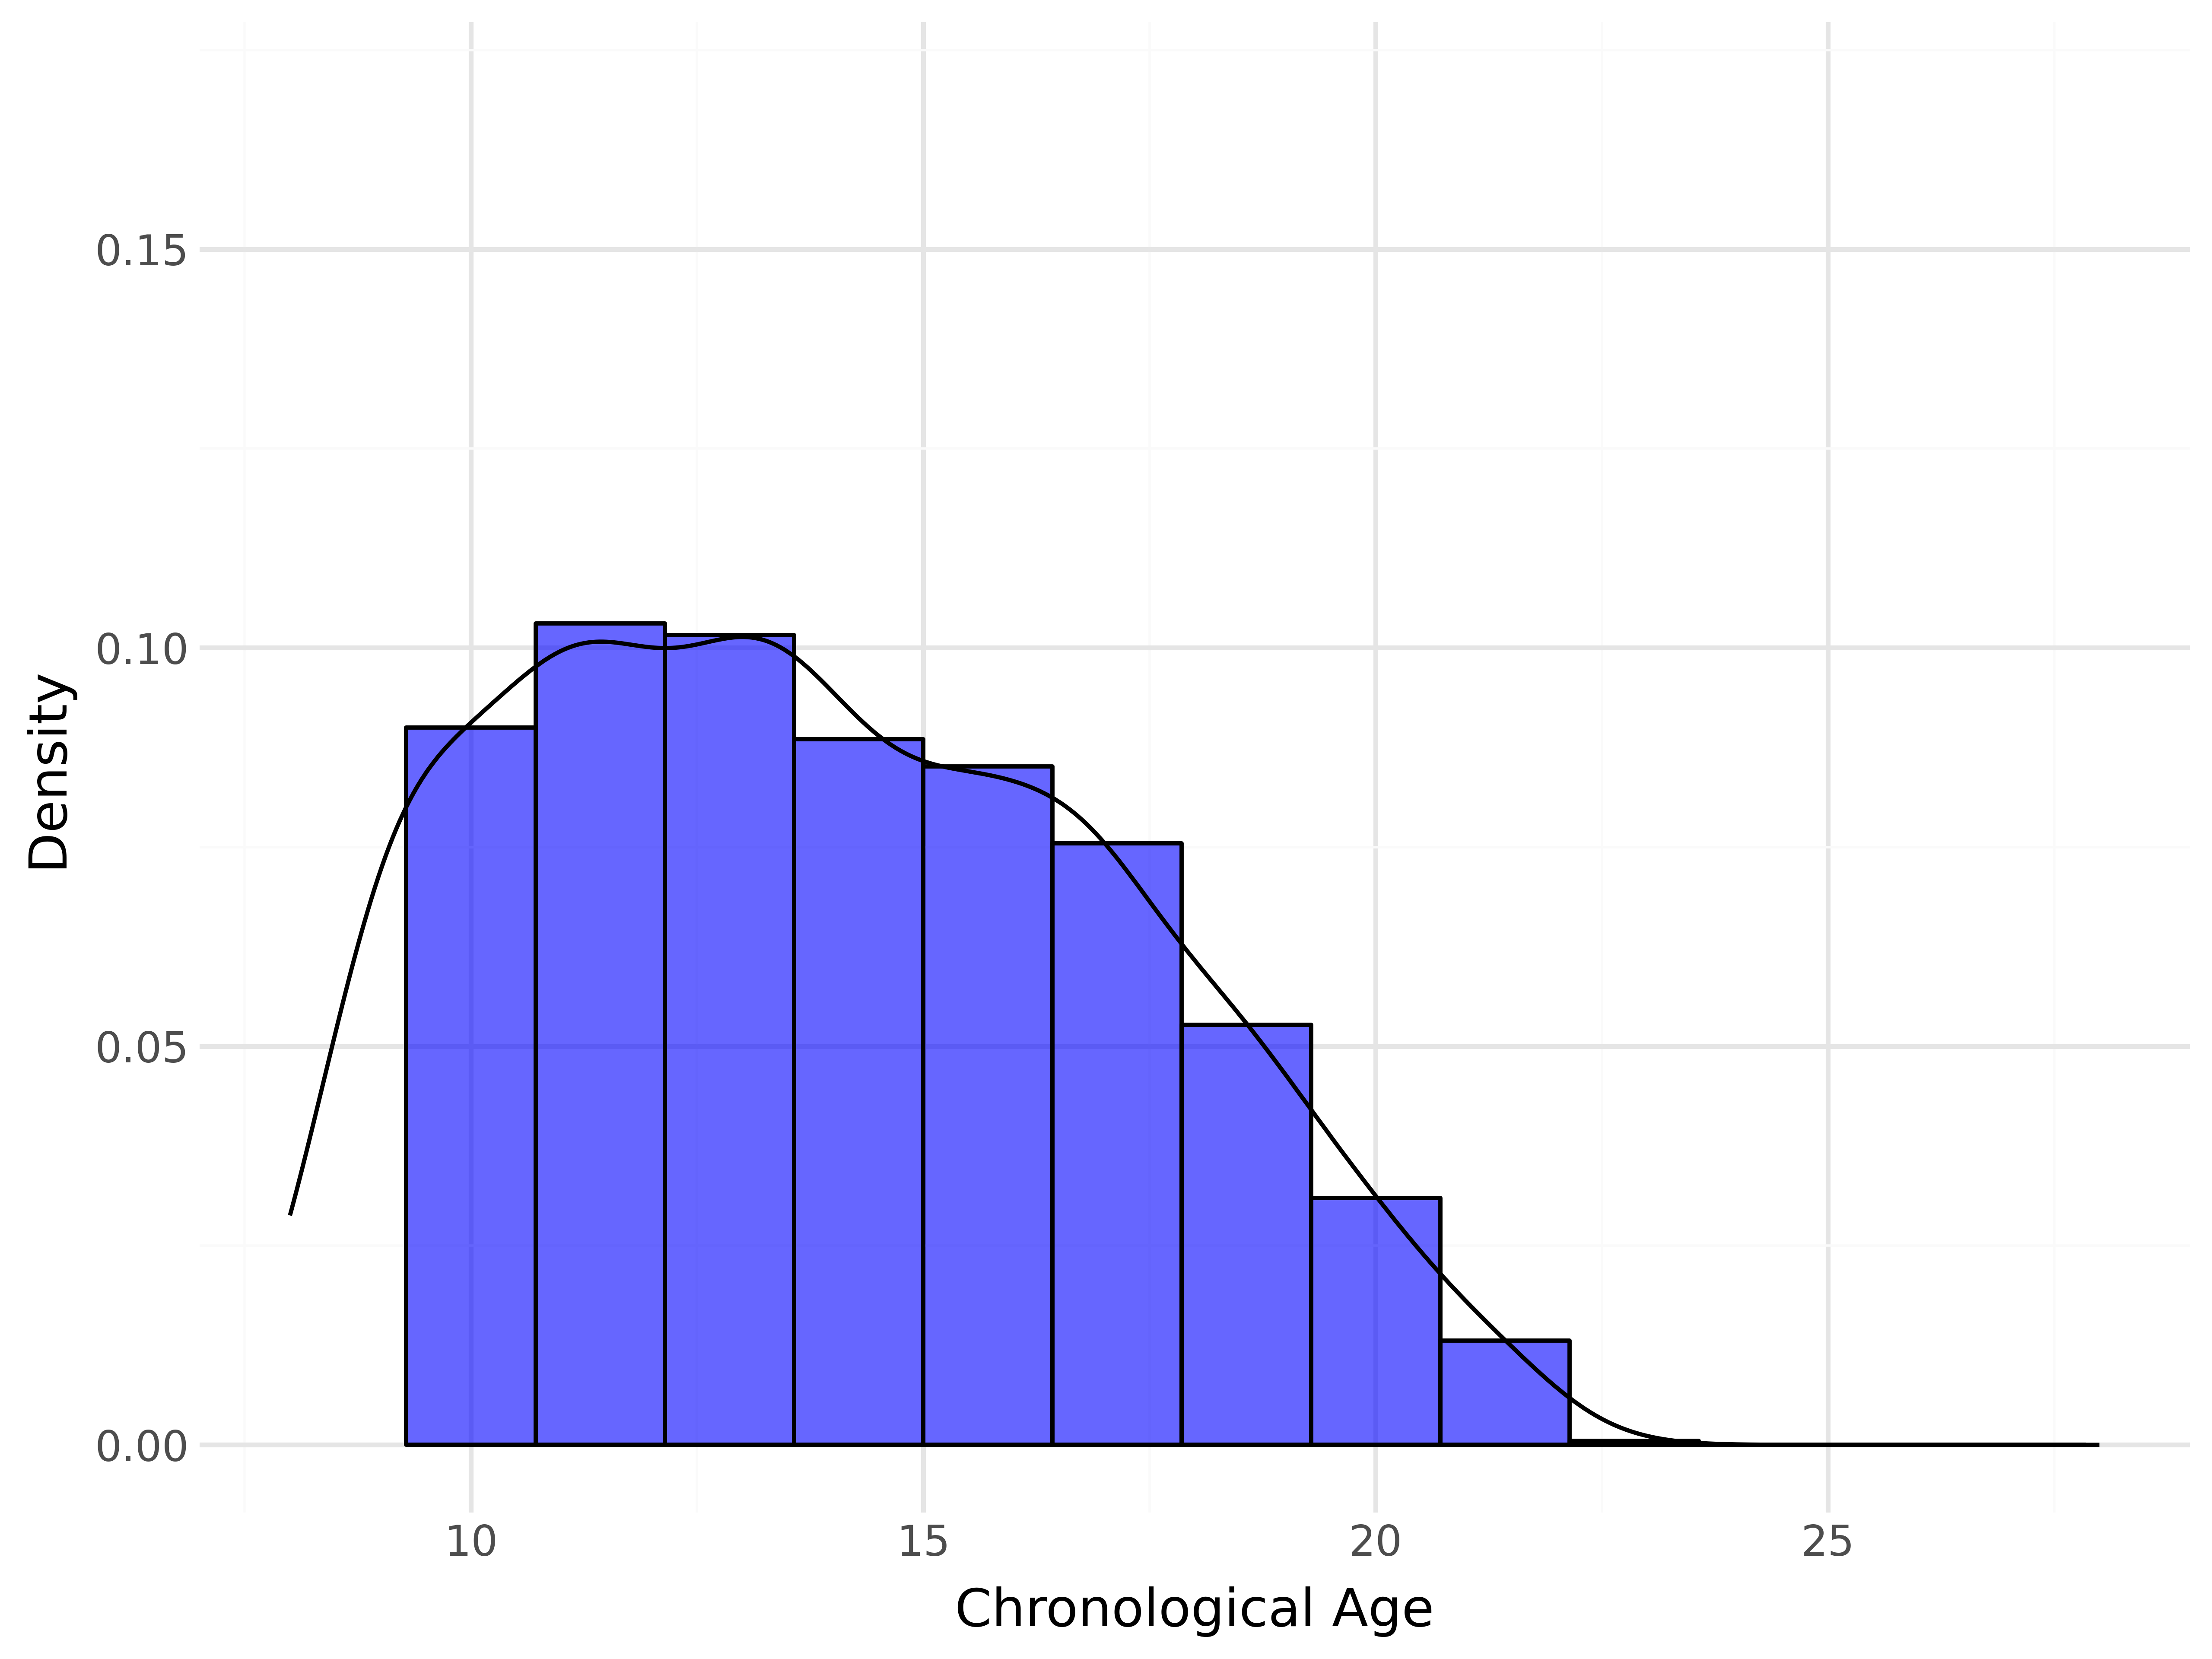

In [42]:
Image(f"{here()}/figures/bhrc_age_distribution.png")

In [43]:
scatter_predicted_chronological(results, 'bhrc')

min age: 6.715948, median: 13.329227, max: 22.466805
<ggplot: (800 x 800)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 8 x 8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/bhrc_chronological_predicted_plot.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 54 rows containing missing values.


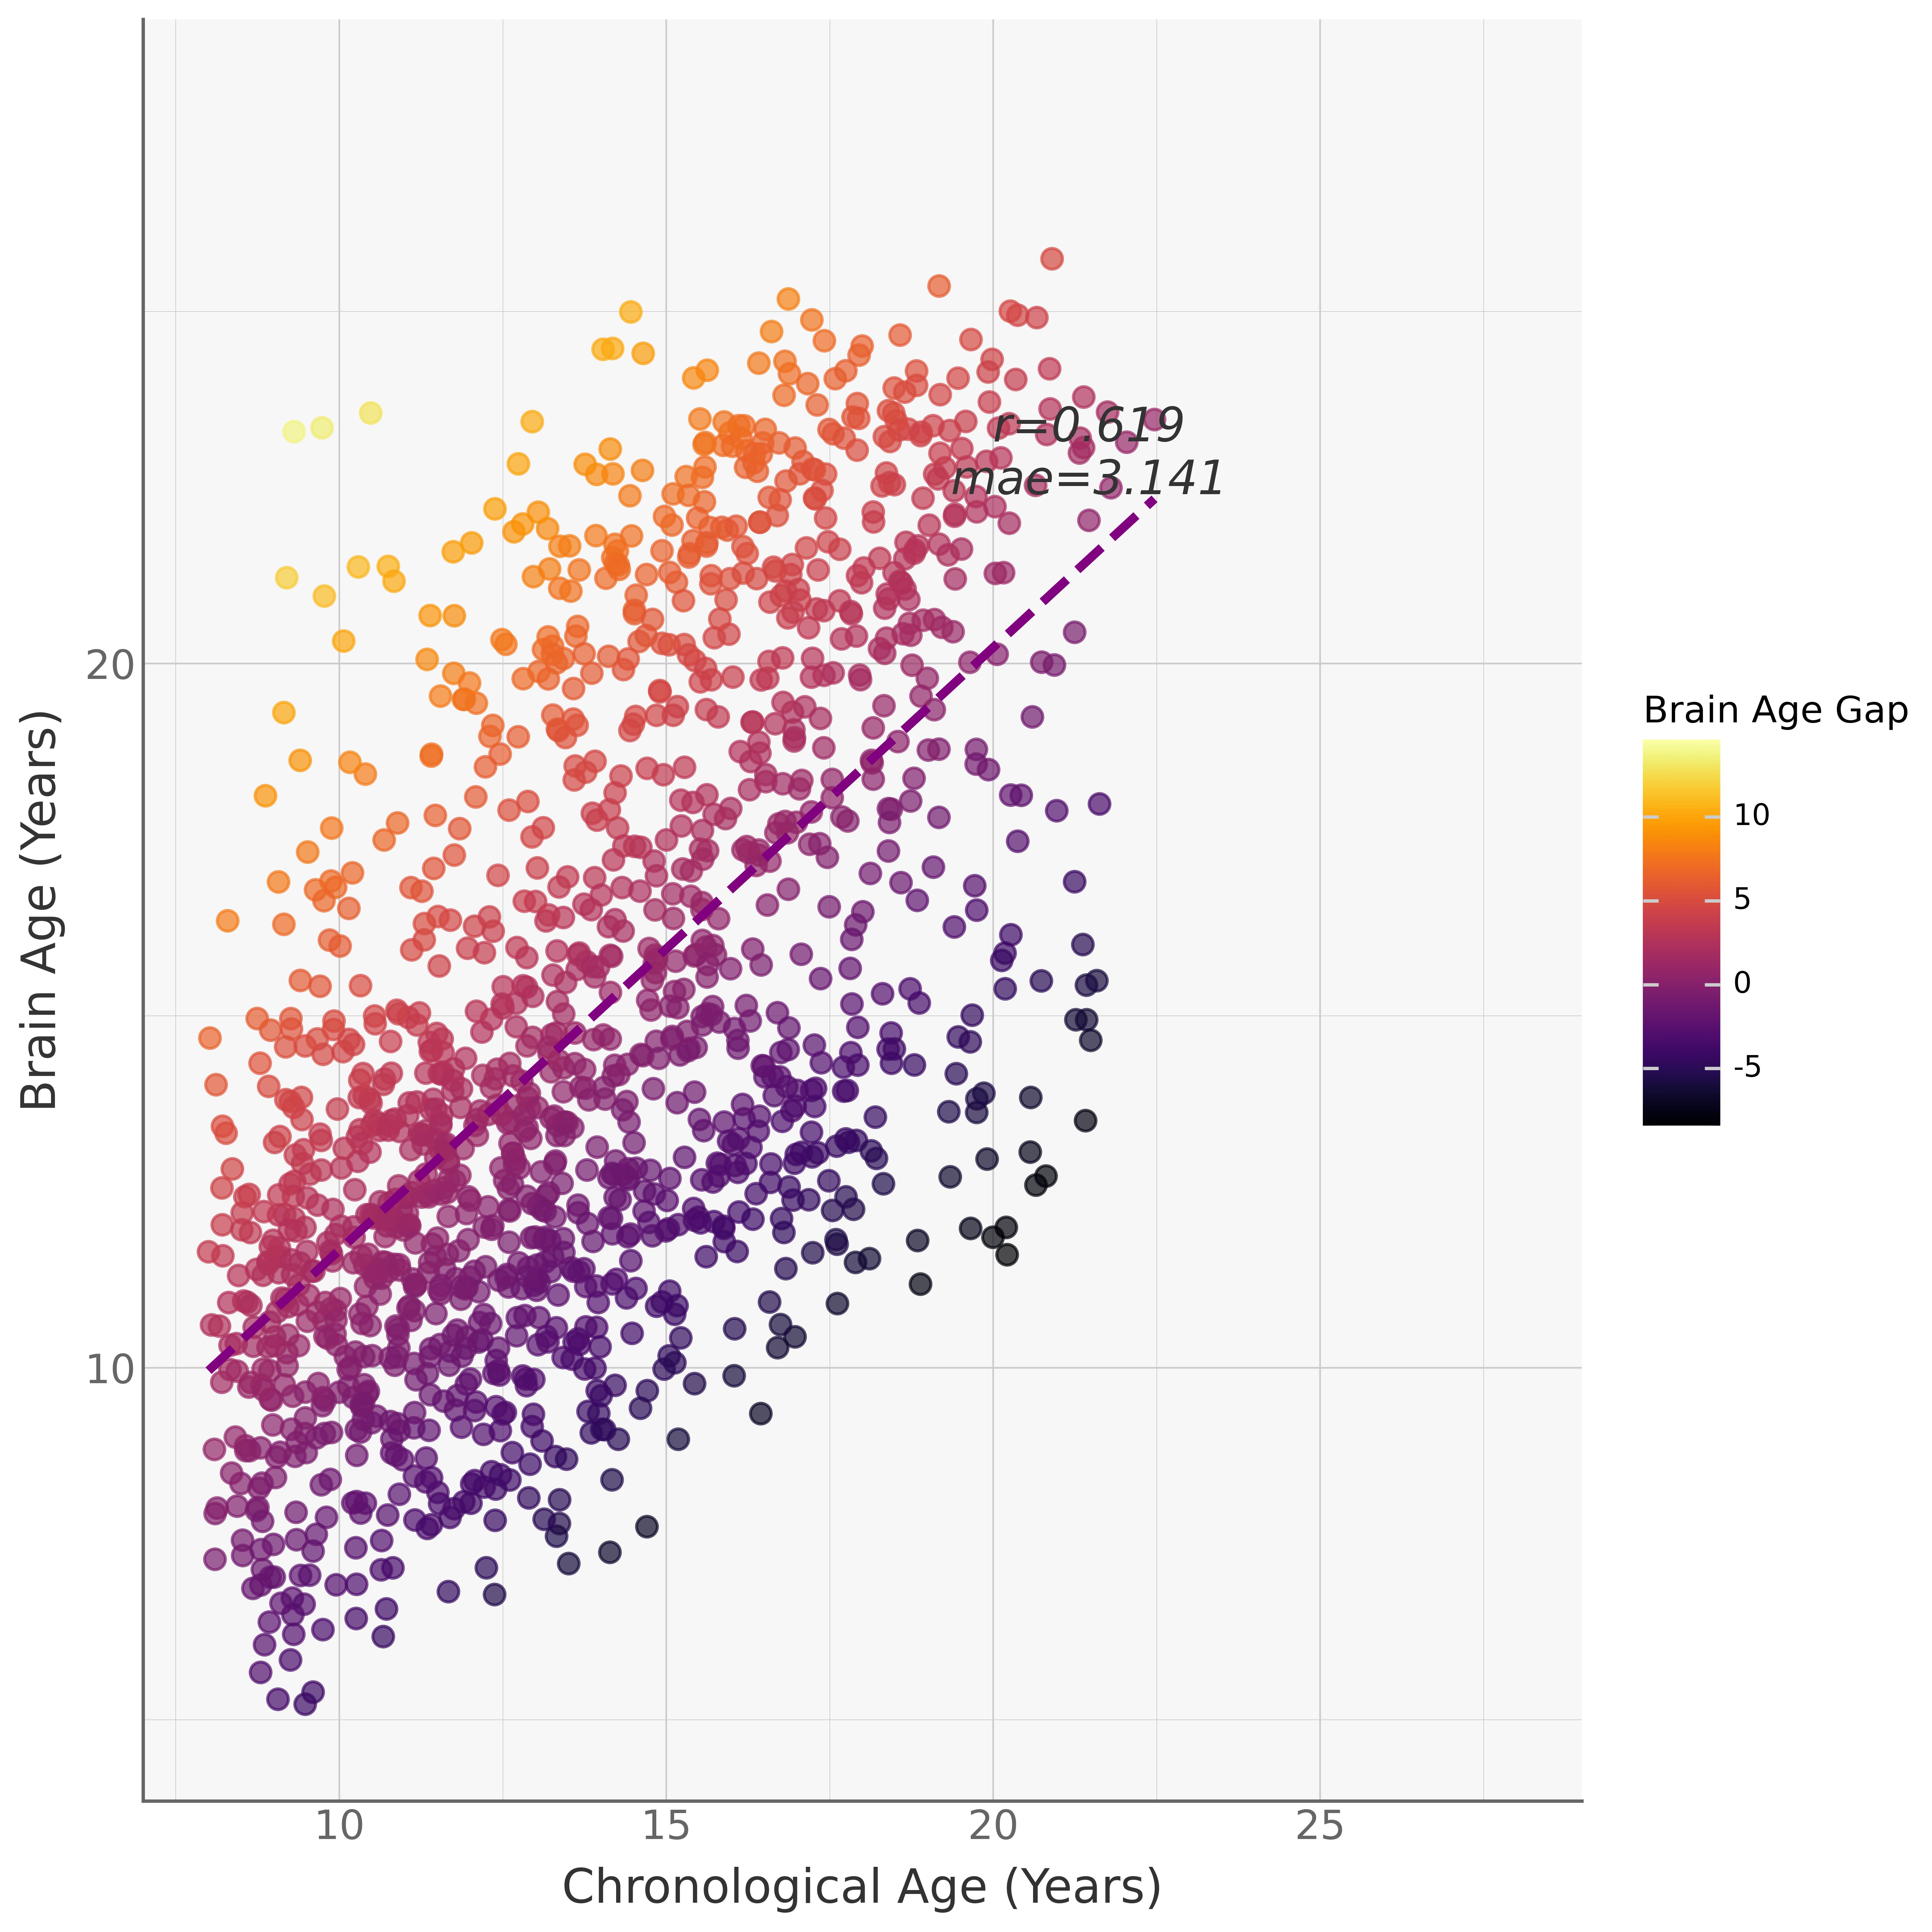

In [44]:
Image(f"{here()}/figures/bhrc_chronological_predicted_plot.png")

In [45]:
scatter_bag_age(results, "bhrc")

min age: 6.715948, median: 13.329227, max: 22.466805
<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/bhrc_bag_age_plot.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_point : Removed 57 rows containing missing values.


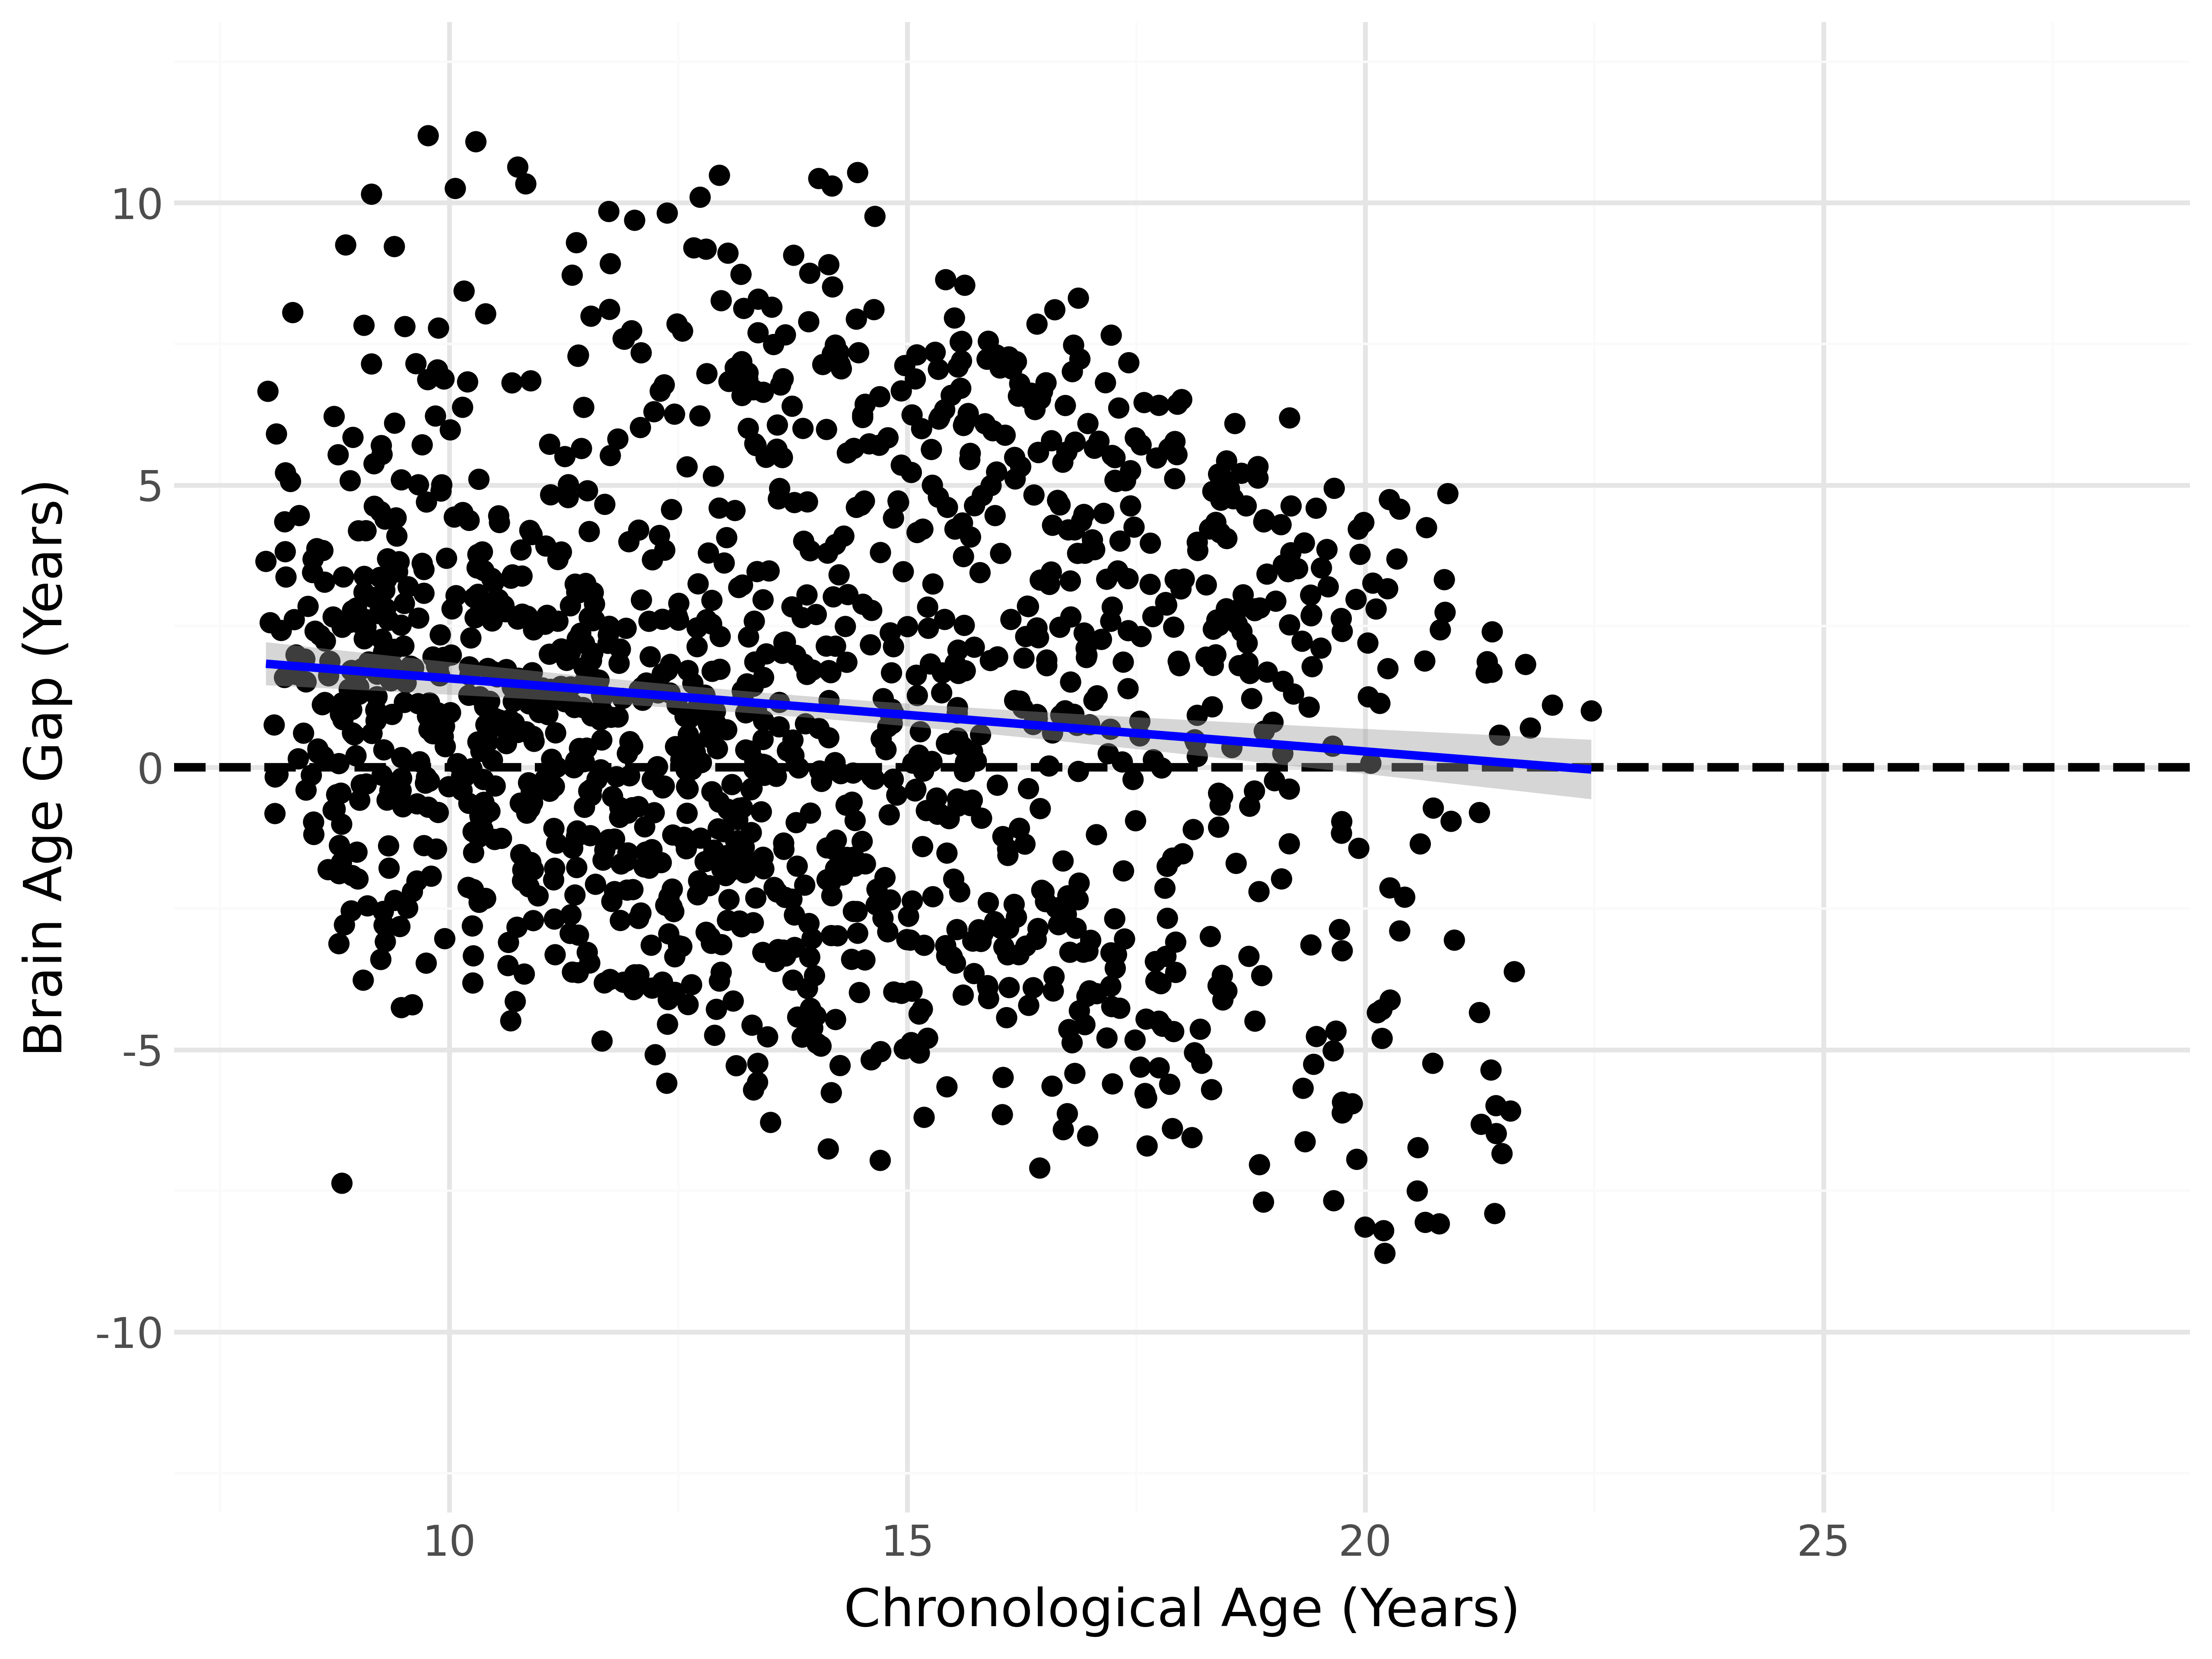

In [46]:
Image(f"{here()}/figures/bhrc_bag_age_plot.png")

In [49]:
brainage_distribution_plot(results, 'bhrc', 'blue')

<ggplot: (640 x 480)>


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:630: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/ggplot.py:631: PlotnineWarning: Filename: /home/murage/Documents/repos/cnnmlp/figures/bhrc_brainage_distribution.png
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_bin : Removed 68 rows containing non-finite values.
/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_density : Removed 68 rows containing non-finite values.


/home/murage/Documents/repos/cnnmlp/venv/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


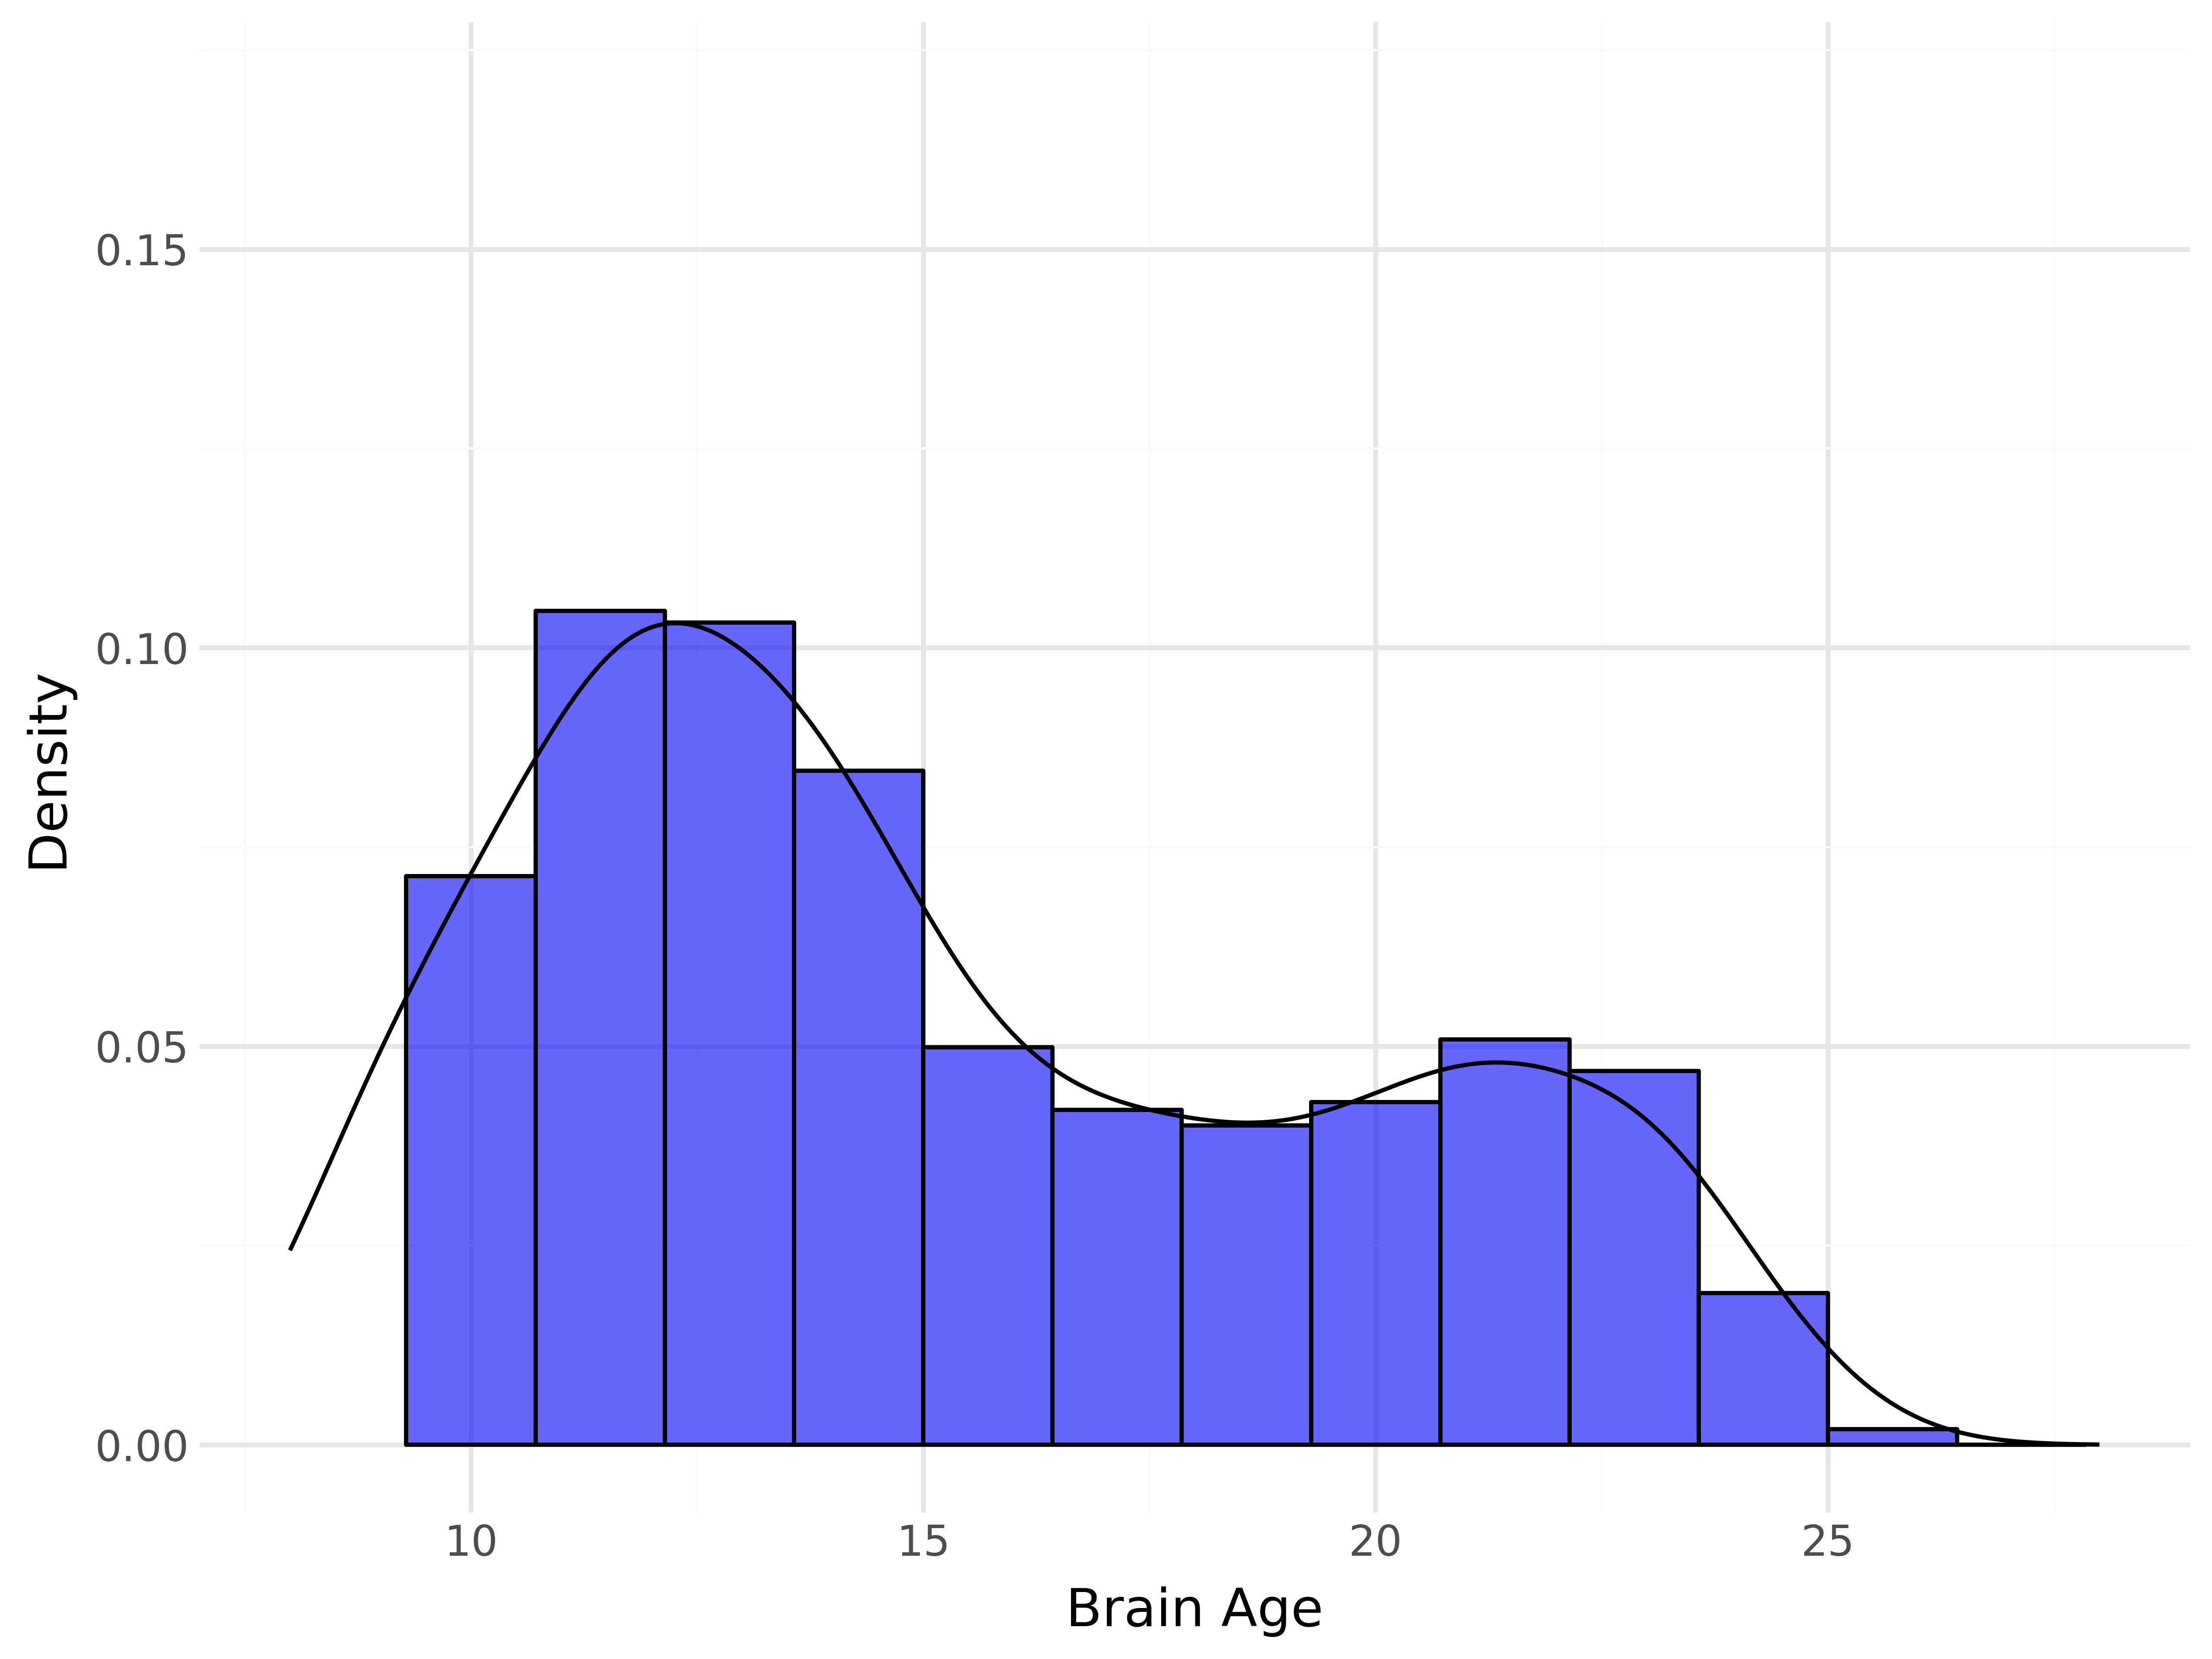

: 

In [ ]:
Image(f"{here()}/figures/bhrc_brainage_distribution.png")